In [1]:
from collections import OrderedDict
from IPython.display import HTML, display
from matplotlib import pyplot as plt
from datetime import datetime

import folium
import io
# import simplejson
# import urllib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import utm
# import webbrowser
% matplotlib inline

In [2]:
def calc_euclidean(
    origin: tuple, destiny: tuple
) -> float:
    return np.sqrt(
        (destiny[0]-origin[0])**2 + 
        (destiny[1]-origin[1])**2
    )

In [3]:
def calc_rectangle(
    origin: tuple, destiny: tuple
) -> float:
    return (
        abs(destiny[0]-origin[0]) + 
        abs(destiny[1]-origin[1])
    )

In [4]:
places = [
    'Badajoz, Teatro López de Ayala',
    'Badajoz, Puente de la Universidad',
    'Badajoz, Centro comercial El Faro',
    'Badajoz, Palacio de Congresos Manuel Rojas',
    'Badajoz, Centro de Salud Valdepasillas',
    'Badajoz, Puerta del Pilar',
    'Badajoz, La Alcazaba',
    'Badajoz, Plaza Alta',
    'Badajoz, Puerta Palma',
    'Badajoz, Puente Real'
]

In [5]:
# Location data from googlemaps
positions_latlon = []
# 1 - Teatro López de Ayala
positions_latlon.append((38.8762837,-6.9745847))
# 2. Puente de la Universidad
positions_latlon.append((38.882257, -6.9861811))
# 3. Centro comercial “El Faro”
positions_latlon.append((38.884088, -7.0242667))
# 4. Palacio de Congresos “Manuel Rojas”,
positions_latlon.append((38.8758768,-6.9704163))
# 5. Fuente de Valdepasillas
positions_latlon.append((38.864476, -6.9780557))
# 6. Puerta del Pilar
positions_latlon.append((38.8750098, -6.9733397))
# 7. La Alcazaba
positions_latlon.append((38.8834097, -6.9707085))
# 8. Plaza Alta
positions_latlon.append((38.8813045, -6.9704468))
# 9. Puerta Palma
positions_latlon.append((38.8805376, -6.9777905))
# 10. Puente Real
positions_latlon.append((38.8781387, -6.9965576))

In [6]:
positions_decimal = [
    utm.from_latlon(*loc)[:2] for loc in positions_latlon
]
positions_decimal

[(675697.1206430902, 4304997.36541177),
 (674676.456215953, 4305638.036457435),
 (671368.2692546261, 4305769.014606624),
 (676059.7504023478, 4304960.241261738),
 (675425.0317394832, 4303680.228215446),
 (675808.2694125636, 4304858.381575373),
 (676015.8069009123, 4305795.706528927),
 (676043.7055033607, 4305562.568521262),
 (675408.5416969855, 4305463.310096603),
 (673786.3670745756, 4305161.157332059)]

In [7]:
map_osm = folium.Map(location=positions_latlon[1], zoom_start=14)

for i, p in enumerate(positions_latlon):
    folium.Marker(p, popup=places[i]).add_to(map_osm)
map_osm

### Distances

In [8]:
matrix_real_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

matrix_euclidean_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

matrix_rectangle_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

In [9]:
# matrix de distancias reais
data_real_csv = """
0;1800;6600;1100;2000;350;1600;1800;900;2600
1800;0;4300;2800;2900;1900;1800;3500;1200;2100
6600;4300;0;7300;5900;6000;5600;7300;5400;4500
1100;2800;7300;0;2300;450;2200;1800;1500;3100
2000;2900;5900;2300;0;2200;3400;4200;2800;2400
350;1900;6000;450;2200;0;1800;1900;1100;2600
1600;1800;5600;2200;3400;1800;0;2200;650;2800
1800;3500;7300;1800;4200;1900;2200;0;1000;3100
900;1200;5400;1500;2800;1100;650;1000;0;2200
2600;2100;4500;3100;2400;2600;2800;3100;2200;0
"""

matrix_real_distance = pd.read_csv(
    io.StringIO(data_real_csv), 
    index_col=False, header=None,
    sep=';'
)

# check values
_m = matrix_real_distance
_n = matrix_real_distance.shape[0]
for i in range(_n):
    for j in range(_n):
        assert _m.iloc[i, j] == _m.iloc[j, i]

In [10]:
for i1, loc1 in enumerate(positions_decimal):
    for i2, loc2 in enumerate(positions_decimal):
        # euclidean distance
        matrix_euclidean_distance.iloc[i1, i2] = (
            calc_euclidean(loc1, loc2)
        )
        
        # rectangle distance
        matrix_rectangle_distance.iloc[i1, i2] = (
            calc_rectangle(loc1, loc2)
        )
    # input()

In [11]:
print('REAL DISTANCE')
display(matrix_real_distance)

print('EUCLIDEAN DISTANCE')
display(matrix_euclidean_distance)

print('RECTANGLE DISTANCE')
display(matrix_rectangle_distance)

REAL DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0,1800,6600,1100,2000,350,1600,1800,900,2600
1,1800,0,4300,2800,2900,1900,1800,3500,1200,2100
2,6600,4300,0,7300,5900,6000,5600,7300,5400,4500
3,1100,2800,7300,0,2300,450,2200,1800,1500,3100
4,2000,2900,5900,2300,0,2200,3400,4200,2800,2400
5,350,1900,6000,450,2200,0,1800,1900,1100,2600
6,1600,1800,5600,2200,3400,1800,0,2200,650,2800
7,1800,3500,7300,1800,4200,1900,2200,0,1000,3100
8,900,1200,5400,1500,2800,1100,650,1000,0,2200
9,2600,2100,4500,3100,2400,2600,2800,3100,2200,0


EUCLIDEAN DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1205.078944,4397.089586,364.525095,1344.947124,177.962231,859.598435,663.004993,548.071398,1917.760932
1,1205.078944,0.000000,3310.778798,1540.424985,2096.038747,1374.359068,1348.599314,1369.330502,752.647629,1009.788285
2,4397.089586,3310.778798,0.000000,4760.683741,4562.932220,4532.422522,4647.614295,4679.991891,4051.821400,2493.328605
3,364.525095,1540.424985,4760.683741,0.000000,1428.741117,271.326526,836.620131,602.540925,822.891871,2282.244295
4,1344.947124,2096.038747,4562.932220,1428.741117,0.000000,1238.917452,2196.420676,1981.404111,1783.158130,2208.703903
5,177.962231,1374.359068,4532.422522,271.326526,1238.917452,0.000000,960.025978,742.502126,725.066040,2044.446679
6,859.598435,1348.599314,4647.614295,836.620131,2196.420676,960.025978,0.000000,234.801326,692.284924,2317.985035
7,663.004993,1369.330502,4679.991891,602.540925,1981.404111,742.502126,234.801326,0.000000,642.872690,2292.751126
8,548.071398,752.647629,4051.821400,822.891871,1783.158130,725.066040,692.284924,642.872690,0.000000,1650.074786
9,1917.760932,1009.788285,2493.328605,2282.244295,2208.703903,2044.446679,2317.985035,2292.751126,1650.074786,0.000000


RECTANGLE DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1661.335473,5100.500583,399.753909,1589.226100,250.132606,1117.027375,911.787970,754.523631,2074.545489
1,1661.335473,0.000000,3439.165111,2061.089382,2706.383766,1911.468079,1497.020756,1442.717224,906.811842,1366.968267
2,5100.500583,3439.165111,0.000000,5500.254493,6145.548876,5350.633189,4674.229569,4881.882334,4345.976952,3025.955095
3,399.753909,2061.089382,5500.254493,0.000000,1914.731709,353.340676,879.408769,618.372159,1154.277540,2474.299398
4,1589.226100,2706.383766,6145.548876,1914.731709,0.000000,1561.391033,2706.253475,2501.014070,1799.571924,3119.593782
5,250.132606,1911.468079,5350.633189,353.340676,1561.391033,0.000000,1144.862442,939.623037,1004.656237,2324.678095
6,1117.027375,1497.020756,4674.229569,879.408769,2706.253475,1144.862442,0.000000,261.036610,939.661636,2863.989023
7,911.787970,1442.717224,4881.882334,618.372159,2501.014070,939.623037,261.036610,0.000000,734.422231,2658.749618
8,754.523631,906.811842,4345.976952,1154.277540,1799.571924,1004.656237,939.661636,734.422231,0.000000,1924.327387
9,2074.545489,1366.968267,3025.955095,2474.299398,3119.593782,2324.678095,2863.989023,2658.749618,1924.327387,0.000000


In [12]:
n = matrix_real_distance.shape[0]

In [13]:
# REAL
series_real_distance = pd.Series(OrderedDict(
    ('%s_%s' % (i, j), 
     matrix_real_distance.iloc[i, j])
    for i in range(n) 
    for j in range(i+1, n)
))

print('Primeiras 5 linhas ...')
series_real_distance.head()

Primeiras 5 linhas ...


0_1    1800
0_2    6600
0_3    1100
0_4    2000
0_5     350
dtype: int64

In [14]:
# EUCLIDEAN
euclidean_analysis = pd.DataFrame(OrderedDict(
    ('%s_%s' % (i, j), 
     [matrix_euclidean_distance.iloc[i, j]])
    for i in range(n) 
    for j in range(i+1, n)
), index=['Euclidean']).T

euclidean_analysis['Real'] = series_real_distance

print('Primeiras 5 linhas ...')
euclidean_analysis.head()

Primeiras 5 linhas ...


,Euclidean,Real
0_1,1205.078944,1800
0_2,4397.089586,6600
0_3,364.525095,1100
0_4,1344.947124,2000
0_5,177.962231,350


In [15]:
# RETANGLE
retangle_analysis = pd.DataFrame(OrderedDict(
    ('%s_%s' % (i, j), 
     [matrix_rectangle_distance.iloc[i, j]])
    for i in range(n) 
    for j in range(i+1, n)
), index=['Retangle']).T

retangle_analysis['Real'] = series_real_distance

print('Primeiras 5 linhas ...')
retangle_analysis.head()

Primeiras 5 linhas ...


,Retangle,Real
0_1,1661.335473,1800
0_2,5100.500583,6600
0_3,399.753909,1100
0_4,1589.226100,2000
0_5,250.132606,350


In [16]:
# Fit and summarize OLS model
euclidean_mod = sm.OLS(
    euclidean_analysis['Real'], 
    euclidean_analysis['Euclidean']
)
euclidean_res = euclidean_mod.fit()
print(euclidean_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Real   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1191.
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           1.69e-33
Time:                        02:32:23   Log-Likelihood:                -353.85
No. Observations:                  45   AIC:                             709.7
Df Residuals:                      44   BIC:                             711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Euclidean      1.4449      0.042     34.505      0.0

In [17]:
# Fit and summarize OLS model
retangle_mod = sm.OLS(
    retangle_analysis['Real'], 
    retangle_analysis['Retangle'], 
)

retangle_res = retangle_mod.fit()
print(retangle_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Real   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     973.1
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           1.20e-31
Time:                        02:32:23   Log-Likelihood:                -358.21
No. Observations:                  45   AIC:                             718.4
Df Residuals:                      44   BIC:                             720.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Retangle       1.2353      0.040     31.195      0.0

In [18]:
euclidean_analysis['Euclidean_Adjusted'] = (
    euclidean_analysis['Euclidean'] *
    euclidean_res.params[0]
)

euclidean_analysis['Diff(%)'] = (
    (1-euclidean_analysis['Euclidean_Adjusted'] /
     euclidean_analysis['Real'])*100
)

print('Primeiras 5 linhas ...')
euclidean_analysis.head()

Primeiras 5 linhas ...


,Euclidean,Real,Euclidean_Adjusted,Diff(%)
0_1,1205.078944,1800,1741.227340,3.265148
0_2,4397.089586,6600,6353.386756,3.736564
0_3,364.525095,1100,526.704964,52.117731
0_4,1344.947124,2000,1943.323891,2.833805
0_5,177.962231,350,257.138924,26.531736


In [19]:
retangle_analysis['Retangle_Adjusted'] = (
    retangle_analysis['Retangle'] *
    retangle_res.params[0]
)

retangle_analysis['Diff(%)'] = (
    (1-retangle_analysis['Retangle_Adjusted'] /
     retangle_analysis['Real'])*100
)

print('Primeiras 5 linhas ...')
retangle_analysis.head()

Primeiras 5 linhas ...


,Retangle,Real,Retangle_Adjusted,Diff(%)
0_1,1661.335473,1800,2052.187574,-14.010421
0_2,5100.500583,6600,6300.463747,4.538428
0_3,399.753909,1100,493.801534,55.108951
0_4,1589.226100,2000,1963.113476,1.844326
0_5,250.132606,350,308.979754,11.720070


Euclidean


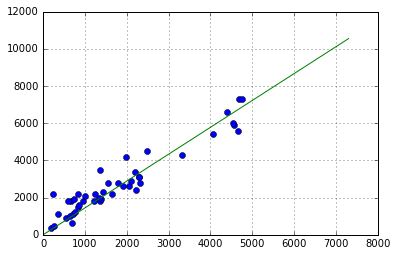

In [20]:
_data = euclidean_analysis.sort_values(by='Real')
_line = np.linspace(0, _data['Real'].max(), 1000)

print('Euclidean')
plt.plot(
    _data['Euclidean'], 
    _data['Real'], 'o'
)
plt.plot(_line, _line*euclidean_res.params[0])
plt.grid()
plt.show()

Retangle


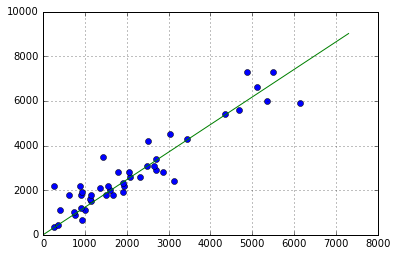

In [21]:
_data = retangle_analysis.sort_values(by='Real')

print('Retangle')
plt.plot(
    _data['Retangle'], 
    _data['Real'], 'o'
)
plt.plot(_line, _line*retangle_res.params[0])
plt.grid()
plt.show()